In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10



In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



170498071/170498071 [==============================] - 13s 0us/step


In [4]:
# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [5]:
# Train the model for 10 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5223 - accuracy: 0.4450 - val_loss: 1.2578 - val_accuracy: 0.5455
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1670 - accuracy: 0.5846 - val_loss: 1.1580 - val_accuracy: 0.5833
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0193 - accuracy: 0.6444 - val_loss: 1.0576 - val_accuracy: 0.6286
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9126 - accuracy: 0.6775 - val_loss: 0.9389 - val_accuracy: 0.6670
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8314 - accuracy: 0.7077 - val_loss: 0.9087 - val_accuracy: 0.6871
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7753 - accuracy: 0.7277 - val_loss: 0.8894 - val_accuracy: 0.6918
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7251 - accuracy: 0.7461 - val_loss: 0.8988 - val_accuracy

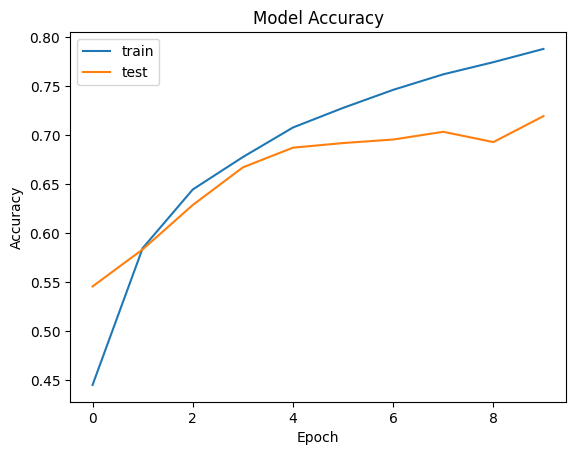

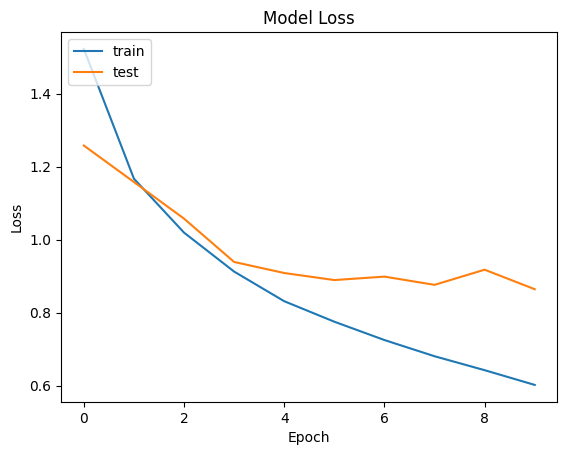

In [6]:
# Plot the accuracy and validation accuracy over the course of training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the loss and validation loss over the course of training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 120ms/step
True labels:
[0 3 7 6 3 9 7 5 3 3 2 3 2 0 4 8]
Predicted labels:
[0 3 7 6 3 9 7 6 3 3 7 1 2 0 4 8]


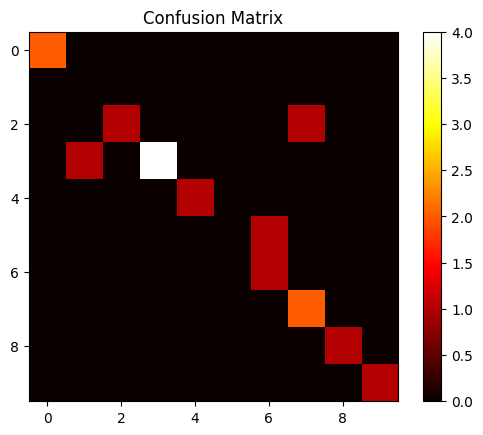

In [7]:
# Select a random sample of images from the test set
num_samples = 16
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Use the trained model to make predictions on the sample images
predictions = model.predict(sample_images)

# Convert the one-hot encoded vectors back into class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

# Print the true and predicted labels for the sample images
print("True labels:")
print(true_labels)
print("Predicted labels:")
print(predicted_labels)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.imshow(conf_matrix, cmap='hot', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()
